In [1]:
using Plots
using DifferentialEquations
using JuliaMBD
using JuliaMBD.Diagram

In [2]:
@model MUS_R_PNT begin
    @parameter begin
        g = 9.8
        M_Rr_wheel = 40
    end
    @xmlmodel("../METI_Vertical_Vibration.drawio", "MUS_R_PNT") 
end

MUS_R_PNT (generic function with 1 method)

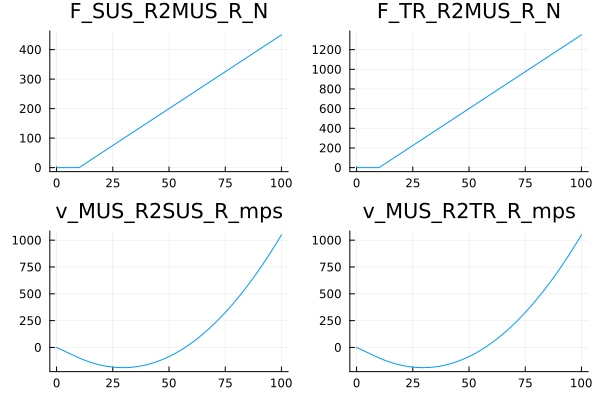

In [3]:
@model testblock begin
    @block begin
        b = MUS_R_PNT()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
    end
    @connect begin
        ramp1.out => b.F_SUS_R2MUS_R_N
        ramp2.out => b.F_TR_R2MUS_R_N
    end
    @scope begin
        b.F_SUS_R2MUS_R_N => F_SUS_R2MUS_R_N
        b.F_TR_R2MUS_R_N => F_TR_R2MUS_R_N 
        b.v_MUS_R2SUS_R_mps => v_MUS_R2SUS_R_mps
        b.v_MUS_R2TR_R_mps => v_MUS_R2TR_R_mps
    end
end
m = @compile testblock()
res = simulate(m, tspan=[0, 100])
plot(res, layout=(2,2))